In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
import sklearn.metrics as sm
from scipy.stats import shapiro
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Data Preprocessing

In [20]:
df = pd.read_csv(r"C:\Users\pardh\OneDrive\Desktop\Big data\car_data.csv")

In [21]:
df.head()

,Unnamed: 0,car_brand,car_model,car_price,car_city,car_fuel,car_transmission,car_drive,car_mileage,car_country,car_engine_capacity,car_engine_hp,car_age
0,0,Ford,Focus,550000,Astrakhan,gasoline,manual,FWD,300000,USA,1.8,125,14
1,1,Mercedes-Benz,GLA-Class,1820000,Astrakhan,gasoline,robot,FWD,88000,DE,1.6,156,10
2,2,Haval,F7,2600000,Astrakhan,gasoline,robot,4WD,19000,CN,1.5,150,2
3,3,Toyota,Camry,4200000,Astrakhan,gasoline,automatic,FWD,30000,JP,3.5,249,2
4,4,OMODA,C5,2125000,Astrakhan,gasoline,CVT,FWD,18824,CN,1.5,147,2


In [22]:
df.describe()

,Unnamed: 0,car_price,car_mileage,car_engine_capacity,car_engine_hp,car_age
count,42089.000000,4.208900e+04,42089.000000,42089.000000,42089.000000,42089.000000
mean,21044.000000,1.712717e+06,144846.070517,1.977084,147.329373,11.697261
std,12150.192077,1.976693e+06,92460.616254,0.782458,69.438003,7.379045
min,0.000000,7.000000e+03,1.000000,0.600000,30.000000,0.000000
25%,10522.000000,7.300000e+05,76500.000000,1.600000,105.000000,6.000000
50%,21044.000000,1.250000e+06,134500.000000,1.700000,130.000000,11.000000
75%,31566.000000,2.024900e+06,200000.000000,2.000000,170.000000,16.000000
max,42088.000000,7.000000e+07,996658.000000,8.000000,1197.000000,84.000000


In [5]:
df.drop(['Unnamed: 0','car_city', 'car_brand', 'car_model'], axis=1, inplace=True)

In [6]:
df.columns

Index(['car_price', 'car_fuel', 'car_transmission', 'car_drive', 'car_mileage',
       'car_country', 'car_engine_capacity', 'car_engine_hp', 'car_age'],
      dtype='object')

In [7]:
df.shape

(42089, 9)

In [8]:
df.columns

Index(['car_price', 'car_fuel', 'car_transmission', 'car_drive', 'car_mileage',
       'car_country', 'car_engine_capacity', 'car_engine_hp', 'car_age'],
      dtype='object')

In [19]:
df.describe()

,Unnamed: 0,car_price,car_mileage,car_engine_capacity,car_engine_hp,car_age
count,42089.000000,4.208900e+04,42089.000000,42089.000000,42089.000000,42089.000000
mean,21044.000000,1.712717e+06,144846.070517,1.977084,147.329373,11.697261
std,12150.192077,1.976693e+06,92460.616254,0.782458,69.438003,7.379045
min,0.000000,7.000000e+03,1.000000,0.600000,30.000000,0.000000
25%,10522.000000,7.300000e+05,76500.000000,1.600000,105.000000,6.000000
50%,21044.000000,1.250000e+06,134500.000000,1.700000,130.000000,11.000000
75%,31566.000000,2.024900e+06,200000.000000,2.000000,170.000000,16.000000
max,42088.000000,7.000000e+07,996658.000000,8.000000,1197.000000,84.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42089 entries, 0 to 42088
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_price            42089 non-null  int64  
 1   car_fuel             42089 non-null  object 
 2   car_transmission     42089 non-null  object 
 3   car_drive            42089 non-null  object 
 4   car_mileage          42089 non-null  int64  
 5   car_country          42089 non-null  object 
 6   car_engine_capacity  42089 non-null  float64
 7   car_engine_hp        42089 non-null  int64  
 8   car_age              42089 non-null  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 2.9+ MB


In [87]:
#check for null values
df.isnull().sum()

car_price              0
car_fuel               0
car_transmission       0
car_drive              0
car_mileage            0
car_country            0
car_engine_capacity    0
car_engine_hp          0
car_age                0
dtype: int64

In [88]:
#check for duplicates
df[df.duplicated()].count()

car_price              195
car_fuel               195
car_transmission       195
car_drive              195
car_mileage            195
car_country            195
car_engine_capacity    195
car_engine_hp          195
car_age                195
dtype: int64

In [89]:
df.drop_duplicates()

,car_price,car_fuel,car_transmission,car_drive,car_mileage,car_country,car_engine_capacity,car_engine_hp,car_age
0,550000,gasoline,manual,FWD,300000,USA,1.8,125,14
1,1820000,gasoline,robot,FWD,88000,DE,1.6,156,10
2,2600000,gasoline,robot,4WD,19000,CN,1.5,150,2
3,4200000,gasoline,automatic,FWD,30000,JP,3.5,249,2
4,2125000,gasoline,CVT,FWD,18824,CN,1.5,147,2
...,...,...,...,...,...,...,...,...,...
42084,450000,diesel,automatic,4WD,183212,JP,3.1,125,30
42085,650000,gasoline,CVT,FWD,110000,JP,1.5,110,13
42086,1350000,gasoline,automatic,4WD,153000,JP,1.5,109,13
42087,550000,gasoline,automatic,4WD,190000,JP,2.0,129,23


# Feature Engineering

In [90]:
df_encoded = pd.get_dummies(df, columns=['car_fuel', 'car_transmission', 'car_drive', 'car_country'], drop_first=True)

In [91]:
df_encoded

,car_price,car_mileage,car_engine_capacity,car_engine_hp,car_age,car_fuel_gasoline,car_fuel_hybrid,car_transmission_automatic,car_transmission_manual,car_transmission_robot,...,car_country_IT,car_country_JP,car_country_KR,car_country_KR,car_country_RUS,car_country_SE,car_country_UK,car_country_UKR,car_country_USA,car_country_UZ
0,550000,300000,1.8,125,14,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,1820000,88000,1.6,156,10,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2600000,19000,1.5,150,2,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,4200000,30000,3.5,249,2,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,2125000,18824,1.5,147,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42084,450000,183212,3.1,125,30,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
42085,650000,110000,1.5,110,13,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
42086,1350000,153000,1.5,109,13,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
42087,550000,190000,2.0,129,23,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


# Exploratory Data Analysis

array([[<Axes: title={'center': 'car_price'}>,
        <Axes: title={'center': 'car_mileage'}>],
       [<Axes: title={'center': 'car_engine_capacity'}>,
        <Axes: title={'center': 'car_engine_hp'}>],
       [<Axes: title={'center': 'car_age'}>, <Axes: >]], dtype=object)

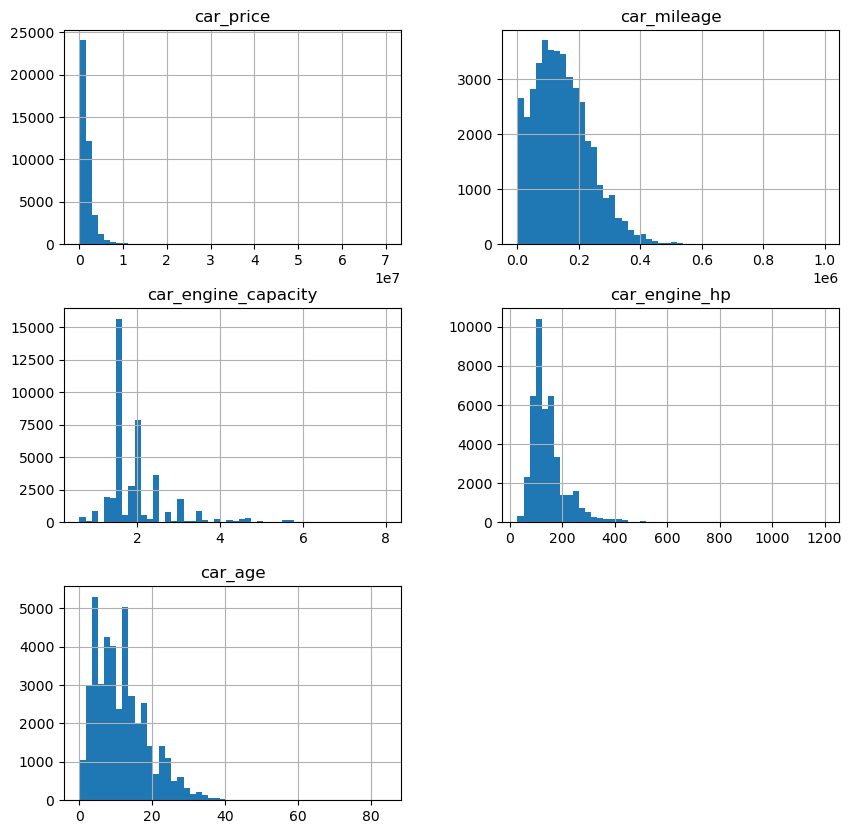

In [92]:
#histograms
df.hist(bins = 50 , figsize =(10,10))

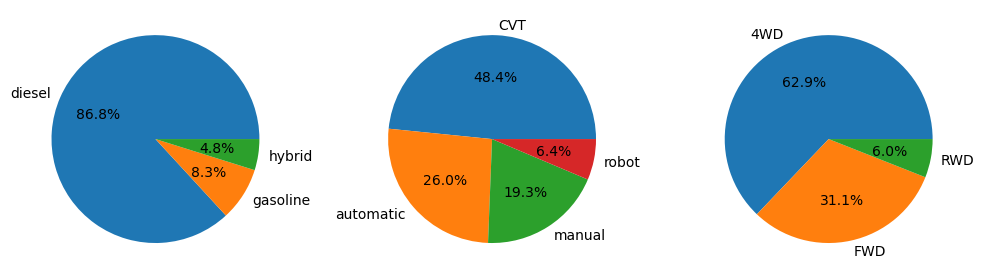

In [93]:
#Pie Charts

plt.figure(figsize=(10, 8))

plt.subplot(1, 3, 1)
plt.pie(df['car_fuel'].value_counts(), autopct='%1.1f%%', labels=['diesel', 'gasoline', 'hybrid'])

plt.subplot(1, 3, 2)
plt.pie(df['car_transmission'].value_counts(), autopct='%1.1f%%', labels=['CVT', 'automatic', 'manual', 'robot'])

plt.subplot(1, 3, 3)
plt.pie(df['car_drive'].value_counts(), autopct='%1.1f%%', labels=['4WD', 'FWD', 'RWD'])

plt.tight_layout()

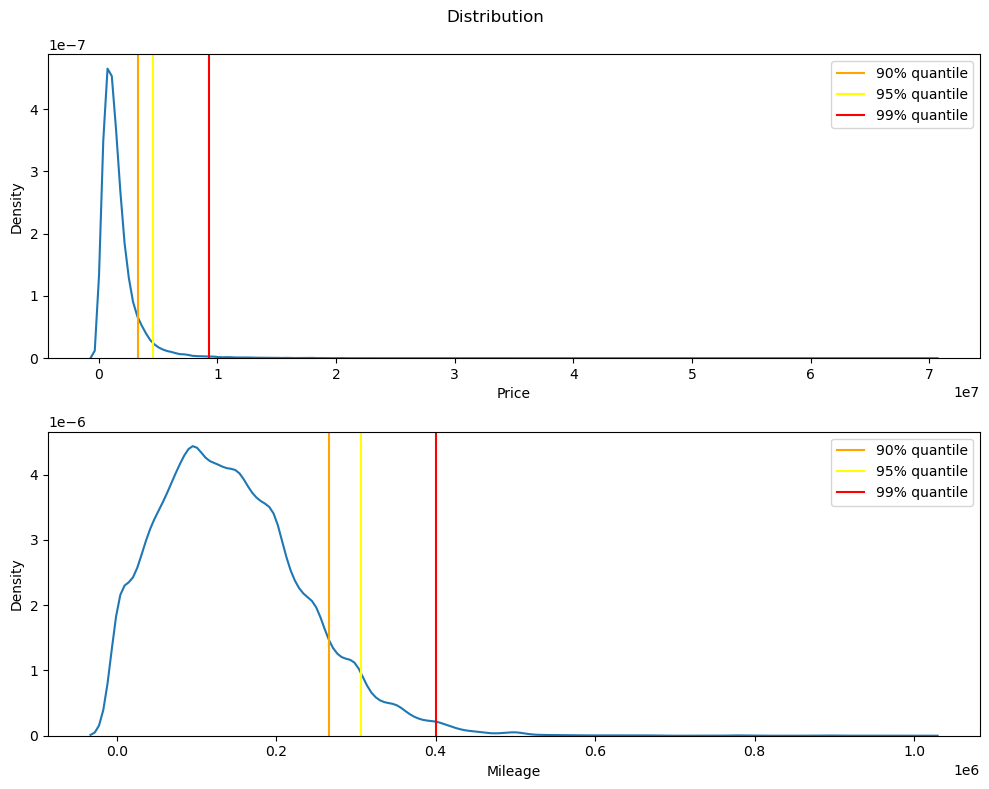

In [94]:
#kernel density estimate (kde) plots

plt.figure(figsize=[10, 8])
plt.suptitle('Distribution')

plt.subplot(2, 1, 1)
sns.kdeplot(df['car_price'])
plt.xlabel("Price")
plt.ylabel('Density')
plt.axvline(df['car_price'].quantile(0.90), label='90% quantile', c='orange')
plt.axvline(df['car_price'].quantile(0.95), label='95% quantile', c='yellow')
plt.axvline(df['car_price'].quantile(0.99), label='99% quantile', c='red')
plt.legend()

plt.subplot(2, 1, 2)
sns.kdeplot(df['car_mileage'])
plt.xlabel("Mileage")
plt.ylabel('Density')
plt.axvline(df['car_mileage'].quantile(0.90), label='90% quantile', c='orange')
plt.axvline(df['car_mileage'].quantile(0.95), label='95% quantile', c='yellow')
plt.axvline(df['car_mileage'].quantile(0.99), label='99% quantile', c='red')
plt.legend()

plt.tight_layout()
plt.show()

In [95]:
density = pd.DataFrame()
density['car_price_bins'] = df['car_price'].quantile([0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 0.99, 1.0])
density['car_mileage_bins'] = df['car_mileage'].quantile([0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 0.99, 1.0])

density

,car_price_bins,car_mileage_bins
0.70,1820000.0,186000.0
0.75,2024900.0,200000.0
0.80,2310000.0,218000.0
0.85,2700000.0,240000.0
0.90,3340000.0,266000.0
0.95,4539599.4,306022.2
0.99,9300000.0,400000.0
1.00,69999999.0,996658.0


In [96]:
# Removing outliers
df = df.loc[df['car_price'] < df['car_price'].quantile(0.90)]
df = df.loc[df['car_mileage'] < df['car_mileage'].quantile(0.95)]

In [97]:
df.describe().round(3)

,car_price,car_mileage,car_engine_capacity,car_engine_hp,car_age
count,35981.000,35981.000,35981.000,35981.000,35981.000
mean,1288272.318,141264.388,1.857,134.928,11.938
std,756531.760,75765.325,0.651,54.495,7.054
min,7000.000,1.000,0.600,30.000,0.000
25%,710000.000,83216.000,1.500,102.000,6.000
50%,1175000.000,137898.000,1.600,123.000,11.000
75%,1760000.000,197533.000,2.000,150.000,16.000
max,3339000.000,314000.000,6.400,1190.000,84.000


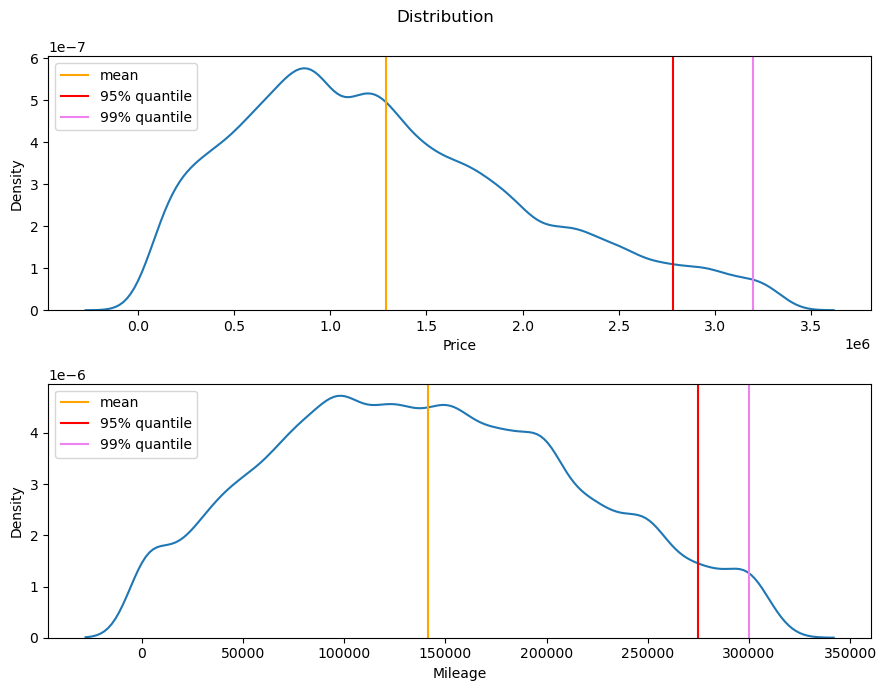

In [98]:
#kde plot

plt.figure(figsize=[9, 7])
plt.suptitle('Distribution')

plt.subplot(2, 1, 1)
sns.kdeplot(df['car_price'])
plt.xlabel("Price")
plt.ylabel('Density')
plt.axvline(df['car_price'].mean(), label='mean', c='orange')
plt.axvline(df['car_price'].quantile(0.95), label='95% quantile', c='red')
plt.axvline(df['car_price'].quantile(0.99), label='99% quantile', c='violet')
plt.legend()

plt.subplot(2, 1, 2)
sns.kdeplot(df['car_mileage'])
plt.xlabel("Mileage")
plt.ylabel('Density')
plt.axvline(df['car_mileage'].mean(), label='mean', c='orange')
plt.axvline(df['car_mileage'].quantile(0.95), label='95% quantile', c='red')
plt.axvline(df['car_mileage'].quantile(0.99), label='99% quantile', c='violet')
plt.legend()

plt.tight_layout()
plt.show()

In [99]:
shapiro(df['car_price'])

ShapiroResult(statistic=0.9594703912734985, pvalue=0.0)

In [100]:
shapiro(df['car_mileage'])

ShapiroResult(statistic=0.9829887747764587, pvalue=0.0)

In [101]:
# correlation
df.corr()

,car_price,car_mileage,car_engine_capacity,car_engine_hp,car_age
car_price,1.000000,-0.386771,0.335443,0.516045,-0.585886
car_mileage,-0.386771,1.000000,0.245031,0.139641,0.574534
car_engine_capacity,0.335443,0.245031,1.000000,0.835015,0.201629
car_engine_hp,0.516045,0.139641,0.835015,1.000000,0.019063
car_age,-0.585886,0.574534,0.201629,0.019063,1.000000


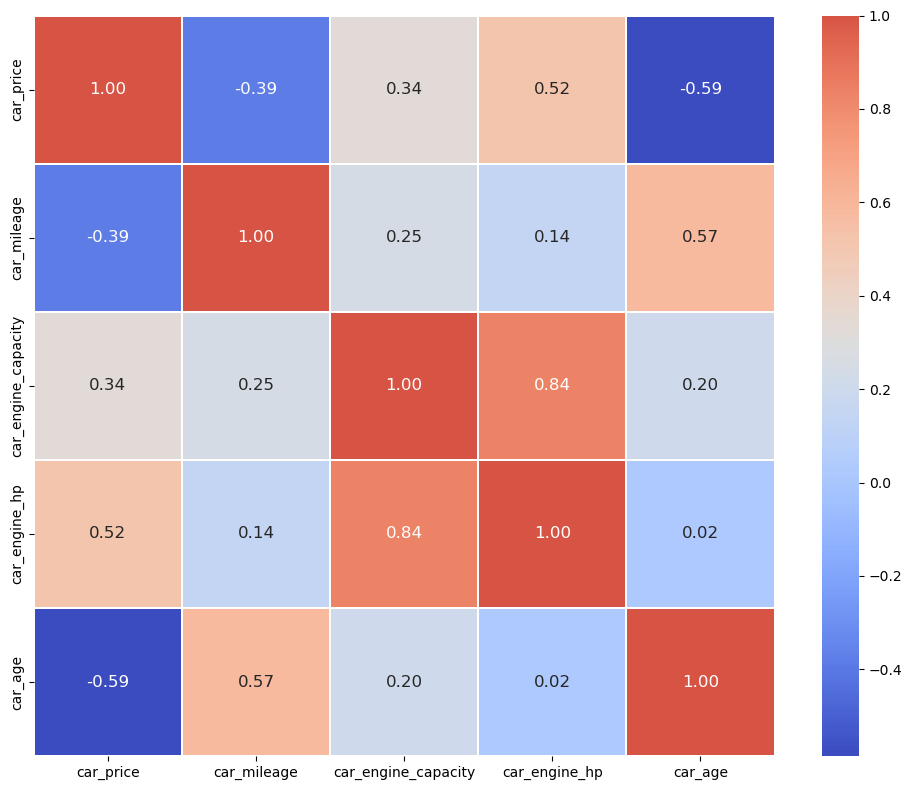

In [102]:
plt.figure(figsize=[10, 8])
sns.heatmap(df.corr(), annot=True , fmt = '.2f', annot_kws={"fontsize": 12}, linewidths=0.25, center= 0.3, cmap= 'coolwarm', square=True)

plt.tight_layout()
plt.show()

In [103]:
df.head()

,car_price,car_fuel,car_transmission,car_drive,car_mileage,car_country,car_engine_capacity,car_engine_hp,car_age
0,550000,gasoline,manual,FWD,300000,USA,1.8,125,14
1,1820000,gasoline,robot,FWD,88000,DE,1.6,156,10
2,2600000,gasoline,robot,4WD,19000,CN,1.5,150,2
4,2125000,gasoline,CVT,FWD,18824,CN,1.5,147,2
6,2539000,gasoline,CVT,FWD,68023,JP,2.0,146,9


# Model Selection

In [104]:
results = pd.DataFrame(columns=['Train RMSE', 'Test RMSE', 'MAE', 'R2', 'MAPE'])

In [105]:
df = df_encoded
X = df.drop(['car_price'], axis=1)
y = df['car_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((33671, 26), (8418, 26), (33671,), (8418,))

# Linear Regression

In [106]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_train_pred = lr.predict(X_train)

lr_train_RMSE = round(sqrt(sm.mean_squared_error(y_train, y_train_pred)), 4)
lr_test_RMSE = round(sqrt(sm.mean_squared_error(y_test, y_pred)), 4)
lr_MAE = round(sm.mean_absolute_error(y_test, y_pred), 4)
lr_R2 = round(sm.r2_score(y_test, y_pred), 4)
lr_MAPE = sm.mean_absolute_percentage_error(y_test, y_pred).round(4)

print(f'Train RMSE = {lr_train_RMSE}')
print(f'Test RMSE = {lr_test_RMSE}')
print(f'MAE = {lr_MAE}')
print(f'R2 = {lr_R2}')
print(f'MAPE = {lr_MAPE}')

Train RMSE = 1321744.1869
Test RMSE = 1075452.5312
MAE = 573928.0063
R2 = 0.6329
MAPE = 0.716


In [107]:
lr_results = {'Train RMSE': lr_train_RMSE, 'Test RMSE': lr_test_RMSE, 'MAE': lr_MAE, 'R2': lr_R2, 'MAPE': lr_MAPE}
results.loc['Linear Regression'] = lr_results

# Decision Tree

In [108]:
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
y_train_pred = tree.predict(X_train)

dt_train_RMSE = round(sqrt(sm.mean_squared_error(y_train, y_train_pred)), 4)
dt_test_RMSE = round(sqrt(sm.mean_squared_error(y_test, y_pred)), 4)
dt_MAE = round(sm.mean_absolute_error(y_test, y_pred), 4)
dt_R2 = round(sm.r2_score(y_test, y_pred), 4)
dt_MAPE = sm.mean_absolute_percentage_error(y_test, y_pred).round(4)

print(f'Train RMSE = {dt_train_RMSE}')
print(f'Test RMSE = {dt_test_RMSE}')
print(f'MAE = {dt_MAE}')
print(f'R2 = {dt_R2}')
print(f'MAPE = {dt_MAPE}')

Train RMSE = 33511.0907
Test RMSE = 704364.271
MAE = 309249.7777
R2 = 0.8425
MAPE = 0.2363


In [109]:
# Tuning hyperparameter with Grid search
parameters = {'max_depth': [1, 3, 5, 7, 10, None],
              'min_samples_leaf': [1, 2, 5, 10, 20, 50],
              'random_state': [42]}

gs_tree = GridSearchCV(tree, parameters, scoring='r2', cv=5)


gs_tree.fit(X_train, y_train)
gs_tree.best_params_

{'max_depth': 10, 'min_samples_leaf': 2, 'random_state': 42}

In [110]:
y_pred = gs_tree.predict(X_test)
y_train_pred = gs_tree.predict(X_train)

dt_train_RMSE = round(sqrt(sm.mean_squared_error(y_train, y_train_pred)), 4)
dt_test_RMSE = round(sqrt(sm.mean_squared_error(y_test, y_pred)), 4)
dt_MAE = round(sm.mean_absolute_error(y_test, y_pred), 4)
dt_R2 = round(sm.r2_score(y_test, y_pred), 4)
dt_MAPE = sm.mean_absolute_percentage_error(y_test, y_pred).round(4)

print(f'Train RMSE = {dt_train_RMSE}')
print(f'Test RMSE = {dt_test_RMSE}')
print(f'MAE = {dt_MAE}')
print(f'R2 = {dt_R2}')
print(f'MAPE = {dt_MAPE}')

Train RMSE = 535814.3094
Test RMSE = 659093.4151
MAE = 298382.6505
R2 = 0.8621
MAPE = 0.236


In [111]:
dt_results = {'Train RMSE': dt_train_RMSE,'Test RMSE': dt_test_RMSE,'MAE': dt_MAE,'R2': dt_R2,'MAPE': dt_MAPE}
results.loc['Decision Tree'] = dt_results

In [112]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_train_pred = rf.predict(X_train)

rf_train_RMSE = round(sqrt(sm.mean_squared_error(y_train, y_train_pred)), 4)
rf_test_RMSE = round(sqrt(sm.mean_squared_error(y_test, y_pred)), 4)
rf_MAE = round(sm.mean_absolute_error(y_test, y_pred), 4)
rf_R2 = round(sm.r2_score(y_test, y_pred), 4)
rf_MAPE = sm.mean_absolute_percentage_error(y_test, y_pred).round(4)

print(f'Train RMSE = {rf_train_RMSE}')
print(f'Test RMSE = {rf_test_RMSE}')
print(f'MAE = {rf_MAE}')
print(f'R2 = {rf_R2}')
print(f'MAPE = {rf_MAPE}')

Train RMSE = 282367.6224
Test RMSE = 517295.7282
MAE = 241584.7466
R2 = 0.9151
MAPE = 0.1919


In [113]:
rf_results = {'Train RMSE': rf_train_RMSE,'Test RMSE': rf_test_RMSE,'MAE': rf_MAE,'R2': rf_R2,'MAPE': rf_MAPE}
results.loc['Random Forest'] = rf_results

In [114]:
model = xgb.XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

xgb_train_RMSE = round(sqrt(sm.mean_squared_error(y_train, y_train_pred)), 4)
xgb_test_RMSE = round(sqrt(sm.mean_squared_error(y_test, y_pred)), 4)
xgb_MAE = round(sm.mean_absolute_error(y_test, y_pred), 4)
xgb_R2 = round(sm.r2_score(y_test, y_pred), 4)
xgb_MAPE = sm.mean_absolute_percentage_error(y_test, y_pred).round(4)

print(f'Train RMSE = {xgb_train_RMSE}')
print(f'Test RMSE = {xgb_test_RMSE}')
print(f'MAE = {xgb_MAE}')
print(f'R2 = {xgb_R2}')
print(f'MAPE = {xgb_MAPE}')

Train RMSE = 282367.6224
Test RMSE = 616251.9622
MAE = 251817.2899
R2 = 0.8795
MAPE = 0.202


In [115]:
xgb_results = {'Train RMSE': xgb_train_RMSE,'Test RMSE': xgb_test_RMSE,'MAE': xgb_MAE,'R2': xgb_R2,'MAPE': xgb_MAPE}
results.loc['XGBoost'] = xgb_results

In [116]:
results

,Train RMSE,Test RMSE,MAE,R2,MAPE
Linear Regression,1.321744e+06,1.075453e+06,573928.0063,0.6329,0.7160
Decision Tree,5.358143e+05,6.590934e+05,298382.6505,0.8621,0.2360
Random Forest,2.823676e+05,5.172957e+05,241584.7466,0.9151,0.1919
XGBoost,2.823676e+05,6.162520e+05,251817.2899,0.8795,0.2020


In [154]:
def predict_car_price():
    user_input = {
        'car_mileage': int(input("Mileage (miles): ")),
        'car_engine_capacity': float(input("Car engine capacity: ")),
        'car_engine_hp': int(input("Horse Power: ")),
        'car_age': int(input("car Age: ")),
        'car_fuel': input("Fuel (diesel/gasoline/hybrid): ").lower(),
        'car_transmission': input("Transmission (auto/manual): ").lower(),
        'car_drive': input("Drive (4WD/FWD/RWD): ").upper(),
        'car_country': input("Country: ").upper()
    }
    
    new_key = 'car_fuel_' + user_input['car_fuel']
    user_input[new_key] = user_input.pop('car_fuel')
    user_input[new_key] = 1
    
    new_key = 'car_transmission_' + user_input['car_transmission']
    user_input[new_key] = user_input.pop('car_transmission')
    user_input[new_key] = 1
    
    new_key = 'car_drive_' + user_input['car_drive']
    user_input[new_key] = user_input.pop('car_drive')
    user_input[new_key] = 1
    
    new_key = 'car_country_' + user_input['car_country']
    user_input[new_key] = user_input.pop('car_country')
    user_input[new_key] = 1

    default_values = {np.dtype('int64'): 0,np.dtype('float64'): 0.0,np.dtype('bool'): False,np.dtype('object'): '', np.dtype('uint8'):0}
    dtypes = df.dtypes
    default_df = pd.DataFrame(columns=df.columns)
    # Update the first row with default values
    for col, dtype in dtypes.items():
        default_df[col] = [default_values[dtype]]
        
    for col, value in user_input.items():
        if col in default_df.columns:
            default_df[col] = value
            
    default_df.drop(columns=['car_price'], inplace=True)

    default_df = scaler.transform(default_df)
    
    return model.predict(default_df)[0]

predicted_price = predict_car_price()
print("Predicted car price: $", round(predicted_price, 2))


Mileage (miles): 36
Car engine capacity: 3.6
Horse Power: 6
car Age: 3
Fuel (diesel/gasoline/hybrid): hybrid
Transmission (auto/manual): manual
Drive (4WD/FWD/RWD): rwd
Country: usa
Predicted car price: $ 3866135.8
